## Análise exploratória de dados com Python

Como podemos conseguir insights iniciais em um projeto de Data Science? Isso é possível com a Análise Exploratória de Dados! A análise exploratória de dados é uma das etapas do workflow de Data Science, é processo no qual explora os conjuntos de dados, responde perguntas e gera visualizações dos dados com o objetivo de guiar a tomada de decisão.

![](Data_visualization_process_v1.png)

A seguir apresentarei as ferramentas necessárias para limpar e validar os dados, visualizar distribuições assim como usar modelos de regressão para prever e explicar relações entre os dados. Explorarei dados de demografia e saúde, porém as técnicas empregadas nesse jupyter notebook aplicam-se a todas as áreas da ciência, engenharia e negócios. Usarei o Pandas, um módulo poderoso para trabalhar com dados, assim como usarei outros módulos importantes do Python, incluindo o NumPy e o SciPy, o StatsModels será usado para regressão e o Matplotlib para gerar visualizações. Com essas ferramentas e habilidades, é possível trabalhar com dados reais, fazer descobertas e apresentar resultados interessantes sobre os dados.

### 1) Carregando, limpando e validando os dados no python

Possivelmente a primeira etapa de quase todos os projetos de data science é carregar os dados, verificar erros, casos especiais e preparar os dados para análise. 

Isso é exatamente o que farei nessa parte do código trabalhando com um conjunto de dados obtido da "National Survey of Family Growth (NSFG)" da "National Center of Health Statistics" (https://www.cdc.gov/nchs/nsfg/index.htm). Esse conjunto de dados possui uma amostra representativa de mulheres e seus filhos dos EUA entre 2013 e 2015, no qual cada observação possui dados da gestação de cada mulher.

#### 1.1) Dicionário dos dados

Quando trabalhamos com conjuntos de dados como o do NSFG, é importante ler a documentação dos dados cuidadosamente. No caso de não haver um dicionário dos dados, será necessário criá-lo antes de iniciar essa etapa do projeto, mas não necessariamente nos moldes do NSFG, pode ser uma tabela simples, onde a primeira coluna é o id da variável, a segunda coluna a variável, e a terceira coluna a descrição dessa variável. O dicionário de dados permite interpretarmos uma variável corretamente, evitando gerar resultados sem sentido. 

O dicionário de dados do NSFG está no seguinte link: https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999. Como exemplo, para acessarmos as informações da variável "BIRTHWGT_OZ1" é necessário digitar no campo de pesquisa "birthweight", em seguida desligue a caixa de seleção que diz "Search variable name only" e pressione "Search". Você deve ver uma lista de variáveis relacionadas ao peso ao nascer ("birthweight"). Feito isso é possível verificar o número de respondentes que reponderam a pesquisa, quantos não etc...

#### 1.2) Explorando os dados do NSFG

Para obter o número de linhas e colunas em um data frame é só usar o atributo "shape". E para obter os nomes das colunas é necessário usar o atributo "columns", o resultado será um Index, que é uma estrutura de dados do Pandas semelhante a uma lista. 

Vamos começar a explorar os dados do NSFG!

In [1]:
# módulos necessário
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# carregando os dados no formato hdf5
nsfg = pd.read_hdf('nsfg.hdf5')

# verificando o número de obervações e colunas
nsfg.shape

(9358, 10)

In [2]:
# visualizando as primeiras observações
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [3]:
# visualizando as variáveis
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [4]:
# verificando o tipo das variáveis
nsfg.dtypes

caseid            int64
outcome           int64
birthwgt_lb1    float64
birthwgt_oz1    float64
prglngth          int64
nbrnaliv        float64
agecon            int64
agepreg         float64
hpagelb         float64
wgt2013_2015    float64
dtype: object

#### 1.3) Validando uma variável

No conjunto de dados do NSFG, a variável "outcome" codifica o resultado de cada gravidez, conforme mostrado abaixo:

|valor  | label |
|--|--|
|1|Live birth|
|2|Induced abortion|
|3|Stillbirth|
|4|Miscarriage|
|5|Ectopic pregnancy|
|6|Current pregnancy|

Dado isso, como podemos responder a seguinte pergunta: Quantas gravidezes neste conjunto de dados terminaram com o bebê vivo (label = "Live birth")?

In [5]:
# usando a função describe para contar occorrências por valor 
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

#### 1.4) Limpando uma variável

No conjunto de dados do NSFG, a variável "nbrnaliv" registra o número de bebês nascidos vivos no final da gravidez.

Se você usar .value_counts() para ver as respostas, verá que o valor 8 aparece uma vez, se você consultar o dicionário de dados do conjunto de dados, verá que esse valor indica que o respondente se recusou a responder a pergunta.

O trabalho aqui é substituir esse valor por np.nan usando o .replace().

In [6]:
# visualizando a frequência dos valores
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [7]:
# módulo necessário
import numpy as np

# substituindo o valor 8 com NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# visualizando a frequência dos valores
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


Sendo cuidadoso com esse tipo de limpeza e validação, economizará tempo e evitará erros potencialmente sérios.

#### 1.5) Computando uma variável

Para cada gravidez no conjunto de dados do NSFG, a variável "agecon" codifica a idade do entrevistado na concepção e a variável "agepreg" a idade do respondente no final da gravidez.

Ambas as variáveis são registradas como números inteiros com duas casas decimais implícitas, portanto, o valor 2575 significa que a idade do respondente foi de 25,75.

Para arrumar isso é necessário selecionar "agecon" e "agepreg", dividir por 100 e atribuir às variáveis locais agecon e agepreg.

In [8]:
# visualizando as primeiras observações da variável "agecon"
nsfg['agecon'].head()

0    2000
1    2291
2    3241
3    3650
4    2191
Name: agecon, dtype: int64

In [9]:
# visualizando as primeiras observações da variável "agepreg"
nsfg['agepreg'].head()

0    2075.0
1    2358.0
2    3308.0
3       NaN
4    2266.0
Name: agepreg, dtype: float64

In [10]:
# selecionando as colunas e dividindo por 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [11]:
# visualizando as primeiras observações da variável "agecon"
agecon.head()

0    20.00
1    22.91
2    32.41
3    36.50
4    21.91
Name: agecon, dtype: float64

In [12]:
# visualizando as primeiras observações da variável "agepreg"
agepreg.head()

0    20.75
1    23.58
2    33.08
3      NaN
4    22.66
Name: agepreg, dtype: float64

Calcularei a estimativa da duração da gravidez, tendo em mente que para cada gravidez o agepreg será maior que o agecon.

In [13]:
# computando a diferença
preg_length = agepreg - agecon

In [14]:
# visualizando as primeiras observações da variável "preg_length"
preg_length.head()

0    0.75
1    0.67
2    0.67
3     NaN
4    0.75
dtype: float64

Usando o .describe() para calcular a duração média e outras estatísticas.

In [15]:
# computando o sumário estatístico
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Uma variável que é calculada a partir de outras variáveis é às vezes chamada de 'recode'. Agora é hora de voltar à pergunta motivadora para esta parte do código: qual é o peso médio dos bebês ao nascer nos EUA?

#### 1.6) Fazendo histogramas

Histogramas são úteis na análise exploratória de dados. Eles rapidamente fornecem uma visão geral da distribuição de uma variável, ou seja, quais valores a variável pode ter e quantas vezes cada valor aparece.

Como vimos em um exercício anterior, o conjunto de dados NSFG inclui uma variável 'agecon' que registra a idade na concepção de cada gravidez. Aqui vou fazer um histograma dessa variável (você pode ler mais sobre histogramas usando o matplotlib na documentação a seguir: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

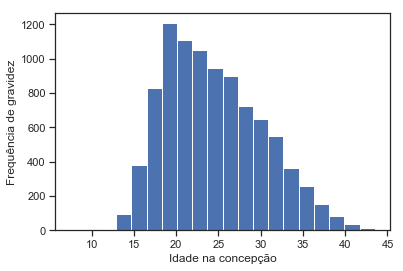

In [16]:
# módulo necessário
import matplotlib.pyplot as plt

# plotando o histograma
plt.hist(agecon, bins=20)

# rótulos dos eixos
plt.xlabel('Idade na concepção')
plt.ylabel('Frequência de gravidez')

# visualizando o histograma
plt.show()

#### 1.7) Computando o peso no nascimento

Agora vamos reunir os passos desta primeira parte do código para calcular o peso médio dos bebês ao nascer, quando a gestação ocorreu acima de 37 semanas.

Eu forneci uma função, resample_rows_weighted, que pega os dados NSFG e os reamostra usando os pesos de amostragem em wgt2013_2015. O resultado é uma amostra representativa da população dos EUA.

Então eu extraio birthwgt_lb1 e birthwgt_oz1, substituindo códigos especiais por NaN, e calculo o peso total ao nascer.

In [17]:
# limpando as variáveis de peso
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# computando o peso total em kg (16 lb = 1kg)
birth_weight = pounds + ounces/16

# criando uma variável booleana dos bebês que nasceram de uma gestação acima de 37 semanas
full_term = nsfg['prglngth'] >= 37

# selecionando os bebês de gestação acima de 37 semanas
full_term_weight = birth_weight[full_term]

# computando a média de peso em kg
print(full_term_weight.mean())

7.372323879231473


#### 1.8) Filtro

No exercício anterior calculei a média do peso para bebês nascidos acima de 37 semanas, filtrei bebês prematuros porque a distribuição de peso é diferente.

A distribuição de peso também é diferente para nascimentos múltiplos, como gêmeos e trigêmeos. Neste exercício, filtrei esses para vermos o efeito que isso tem na média.

In [18]:
# filtrando bebês que nasceram sem irmão gêmeo
single = nsfg['nbrnaliv'] == 1

# computando o peso de bebês que nasceram SEM irmão gêmeo e acima de 37 semanas
single_full_term_weight = birth_weight[single & full_term]
print('Média:', single_full_term_weight.mean())

Média: 7.385643450184502


In [19]:
# computando o peso de bebês que nasceram com irmão gêmeo e acima de 37 semanas
mult_full_term_weight = birth_weight[~single & full_term]
print('Média:', mult_full_term_weight.mean())

Média: 5.768055555555556


Agora que temos dados limpos, estamos prontos para explorar. Na parte do 2 do código, veremos as distribuições de variáveis no NSFG e exploraremos a relação entre educação e renda.

### 2) Distribuições

No primeira parte do código, depois de limpar e validar os dados, comecei a explorá-los usando histogramas para visualizar as distribuições. Agora vou mostrar como representar distribuições usando "Probability Mass Functions  (PMFs)" e "Cumulative Distribution Functions (CDFs)". Mostrarei quando usar cada um deles e por que.

Nessa segunda parte do código irei trabalhar com um novo conjunto de dados obtido do "General Social Survey (GSS)" (link: https://gss.norc.org/), no qual é uma pesquisa anual, que desde de 1972, conta com uma amostra representativa da população adulta dos EUA e que coleta dados sobre demografia e opiniões sobre política e sociedade. A pesquisa possui muitas variáveis, por isso foram selecionadas algumas variáveis no qual já foram validadas.

#### 2.1) PMF

O conjunto de dados do GSS será carregado um data frame chamado "gss".

Neste exercício, me concentrarei na variável "year" neste conjunto de dados, que representa o ano em que cada entrevistado foi entrevistado.

In [20]:
# carregando os dados do GSS
gss = pd.read_hdf('gss.hdf5', 'gss')

# visualizando as primeiras observações
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


Em estatística, a função massa de probabilidade é uma função que associa a cada possível ocorrência de uma variável aleatória discreta uma probabilidade.

In [21]:
# criando função de PMF
def PMF(x):
    df = pd.DataFrame()
    df['count'] = x.value_counts()
    df['item_counts'] = df.index
    df = df.sort_values(by='item_counts')
    df['PMF'] = df['count'] / df['count'].sum()
    return df

In [22]:
# PMF do ano
gss_year_pmf = PMF(gss['year'])

# visualizando primeiras observações
gss_year_pmf.head()

,count,item_counts,PMF
1972,1613,1972,0.025822
1973,1504,1973,0.024077
1974,1484,1974,0.023757
1975,1490,1975,0.023853
1976,1499,1976,0.023997


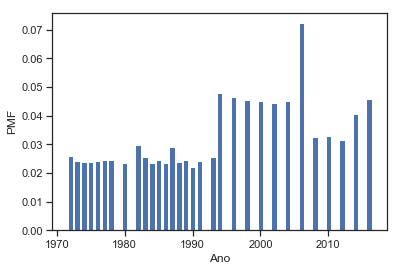

In [23]:
# plotando o histograma da PMF
plt.bar(gss_year_pmf['item_counts'], gss_year_pmf['PMF'])
plt.xlabel('Ano')
plt.ylabel('PMF')
plt.show()

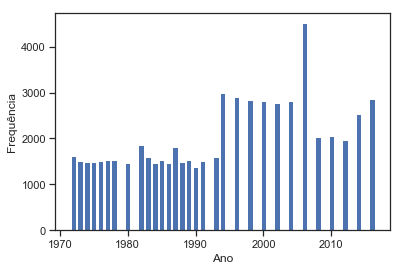

In [24]:
# plotando o histograma por ocorrência
plt.bar(gss_year_pmf['item_counts'], gss_year_pmf['count'])
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

Quantas pessoas foram entrevistados em 2016?

In [25]:
gss_year_pmf[(gss_year_pmf.item_counts == 2016)]

,count,item_counts,PMF
2016,2867,2016,0.045897


O exemplo anterior evidencia como a PMF facilita a obtenção de insights. Hora de visualizar o PMF para a variável de idade deste conjunto de dados do GSS!

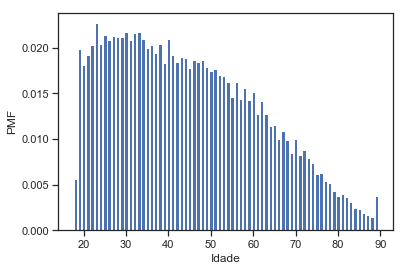

In [26]:
# PMF da idade
gss_age_pmf = PMF(gss['age'])

# plotando o histograma da PMF
plt.bar(gss_age_pmf['item_counts'], gss_age_pmf['PMF'])
plt.xlabel('Idade')
plt.ylabel('PMF')
plt.show()

#### 2.2) CDF

A CDF é a probabilidade acumulada da PMF, ele é útil para encontrar probabilidades menores ou maiores de um determinado valor. 

In [27]:
# criando função da CDF
def CDF(x):
    df = pd.DataFrame()
    df['count'] = x.value_counts()
    df['item_counts'] = df.index
    df = df.sort_values(by='item_counts')
    df['PMF'] = df['count'] / df['count'].sum()
    df['CDF'] = df['PMF'].cumsum()
    return df

In [28]:
# CDF da idade
gss_age_cdf = CDF(gss['age'])

# visualizando primeiras observações
gss_age_cdf.head()

,count,item_counts,PMF,CDF
18.0,350,18.0,0.005620,0.005620
19.0,1238,19.0,0.019878,0.025497
20.0,1128,20.0,0.018111,0.043609
21.0,1197,21.0,0.019219,0.062828
22.0,1261,22.0,0.020247,0.083075


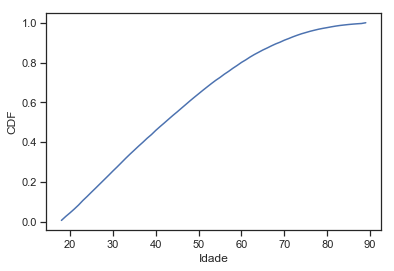

In [29]:
# plotando o histograma da CDF
plt.plot(gss_age_cdf['item_counts'], gss_age_cdf['CDF'])
plt.xlabel('Idade')
plt.ylabel('CDF')
plt.show()

#### 2.2) Comparando distribuições

Vimos como é possível representar distribuições de probabilidade através da PMF e da CDF. Agora vamos usar a PMF e a CDF para comparar distribuições assim como veremos os prós e contras de cada uma delas.

Uma maneira de comparar distribuições é plotar multiplas PMFs no mesmo eixo. Como exemplo, vamos supor que queremos comparar as distribuições de idade entre respondentes homens e mulheres do conjunto de dados do GSS.

Primeiro criamos um "Series" boleano que é verdadeiro para repondentes do sexo masculino.

In [30]:
male = gss['sex'] == 1

Depois extraimos a coluna de idade.

In [31]:
age = gss['age']

Agora selecionamos as idades dos respondentes do sexo masculino e feminino respectivamente.

In [32]:
male_age = age[male]
female_age = age[~male] 

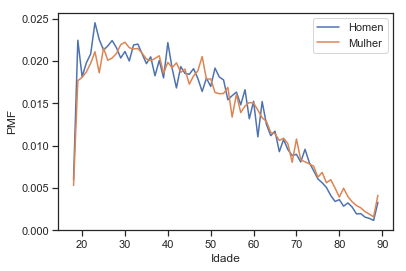

In [33]:
pmf_male_age = PMF(male_age)
pmf_female_age = PMF(female_age)

plt.plot(pmf_male_age['item_counts'], pmf_male_age['PMF'], label='Homen')
plt.plot(pmf_male_age['item_counts'], pmf_female_age['PMF'], label='Mulher')
plt.xlabel('Idade')
plt.ylabel('PMF')
plt.legend()
plt.show()

Não fica clara a diferença entre as distribuições usado a PMF nesse caso. Vamos tentar com a CDF agora.

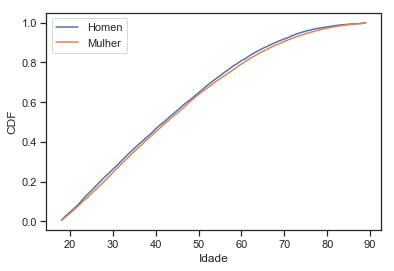

In [35]:
cdf_male_age = CDF(male_age)
cdf_female_age = CDF(female_age)

plt.plot(cdf_male_age['item_counts'], cdf_male_age['CDF'], label='Homen')
plt.plot(cdf_male_age['item_counts'], cdf_female_age['CDF'], label='Mulher')
plt.xlabel('Idade')
plt.ylabel('CDF')
plt.legend()
plt.show()

No geral a CDF é mais suavizada comparadas com as PMF, e por conta dessa suavização da aleatoriedade podemos ter uma visão real das diferenças entre essas distribuições. Nesse caso vemos que as ditribuições são bem semelhantes, mas fica evidente que a curva azul está a esquerda da laranja, que mostra que os homens são mais jovens a cada percentil.

Vamos verificar mais um caso para esses dados, no caso a distribuição de renda comparando os entrevistados antes de 1955 e após 1995.

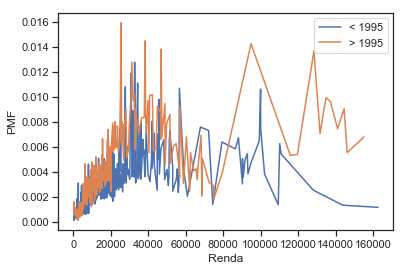

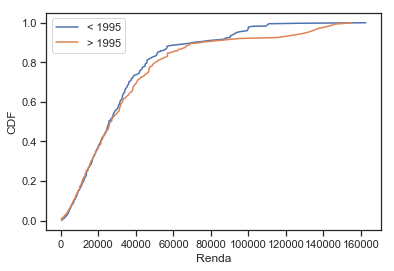

In [40]:
income = gss['realinc']
pre95 = gss['year'] < 1995 # serie boleana para respondentes entrevistados antes de 1995

# PMF
pmf_before1995 = PMF(income[pre95])
pmf_after1995 = PMF(income[~pre95])

plt.plot(pmf_before1995['item_counts'], pmf_before1995['PMF'], label='< 1995')
plt.plot(pmf_after1995['item_counts'], pmf_after1995['PMF'], label='> 1995')
plt.xlabel('Renda')
plt.ylabel('PMF')
plt.legend()
plt.show()

# CDF
cdf_before1995 = CDF(income[pre95])
cdf_after1995 = CDF(income[~pre95])

plt.plot(cdf_before1995['item_counts'], cdf_before1995['CDF'], label='< 1995')
plt.plot(cdf_after1995['item_counts'], cdf_after1995['CDF'], label='> 1995')
plt.xlabel('Renda')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Em construção ;*